# Acknowledgement

Các tình huống, định danh và dữ liệu dưới đây điều được giả định theo kinh nghiệm của người viết không mục đích chỉ định bất cứ cá nhân hay tổ chức nào. Bài toán và dữ liệu được đảm bảo tạo ra để phục vụ mục đích học tập. Không có bất kỳ sao chép dữ liệu trái phép nào được thực hiện. Dữ liệu được dùng thuật toán ngẫu nhiên và 1 số tác động bên trong phân phối dữ liệu.

# Bản quyền
Vui lòng không chia sẻ hay sao chép bất kỳ thông tin, nội dung hay dữ liệu của bài viết này và dùng cho mục đích thương mại khi chưa có sự đồng ý của tác giả. Tất cả dữ liệu, nội dung, thông tin chỉ được phép mục đích học tập và được sự đồng ý từ tác giả. Vui lòng liên hệ hthquan28@gmail.com nếu có nhu cầu hợp tác. Nếu bạn thấy có sự sao chép trái phép dữ liệu này ở nơi khác, vui lòng cho mình thông tin để đảm bảo quyền lợi của bạn và người mua khóa học này.

Đọc thêm: [Acknowledgement](https://docs.google.com/document/d/1gRZRnfyw3PPxLs4T7NxdiF7_Gi887IiCkygBMNUhG40/edit?usp=sharing)

# Recap 


Ở bài tập 1 & 2, bạn đã được thực hành cách phân tích, visualize đối với label và feature data

Bài tập này chúng ta sẽ đi qua modeling, xây dựng 1 model phân biệt khách hàng tốt hay xấu

# A. Modeling

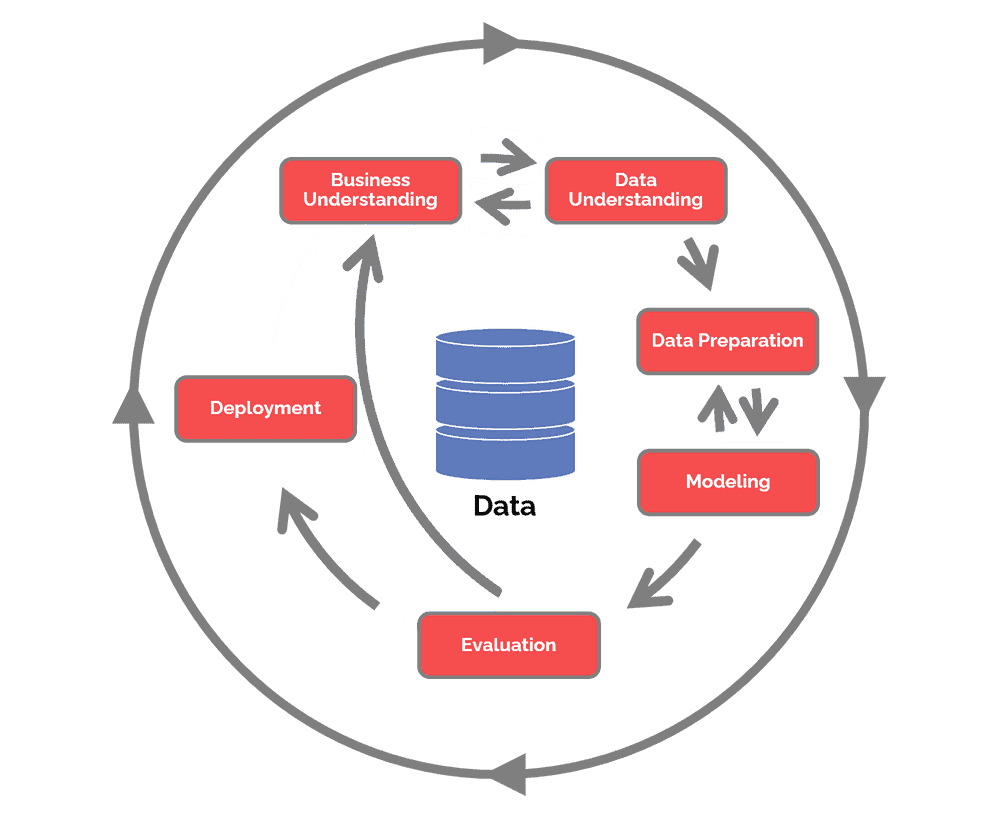



Đây là framework [CRISP-DM](https://www.datascience-pm.com/crisp-dm-2/) được phát triển bởi các chuyên gia Data Scientist trên toàn thế giới mô tả data science process. 

Về cơ bản, 1 dự án Data Science là những targets liên tục không hồi kết (đi làm mà bạn thấy công ty hết việc là cty sắp phá sản đấy). Khác với Product Software, dự án hoàn thành xong sẽ được chuyển giao và maintain.

Dự án Data Science có thể có mốc timeline để đề ra mục tiêu cụ thể, sau khi hoàn thành sẽ có những KPI khác hoặc chờ đánh giá kết quả.

Tương tự mô hình CRISP-DM cũng vậy là 1 vòng tròn xoay quanh giữa việc: understand business requirement, analysis, data mining, modeling, evaluating & deployment. Những điểm nào mà business-stackholders cảm thấy chưa đạt sẽ improve tiếp và quay lại các bước trên

Quay lại bài toán của chúng ta, chúng ta đã đi qua các bước **Business Understand, Data Understand, Data Preparation** (mình đã làm giúp các bạn) và giờ chúng ta tới phần ***Modeling***.

Bên trong phần Modeling sẽ có các steps nhỏ sau:

- Feature Engineering
- Train/Test selection
- Model selection
- Training model
- Evaluate model
- Scoring

Đừng quá lo lắng, nếu bạn thấy nhiều. Mình sẽ giúp các bạn phần này, các bạn chỉ cần làm theo hướng dẫn của mình

**scikit-learn**: scikit learn là 1 thư viện chuyên giải quyết các bài toán Machine Learning.

Nếu các bạn chưa cài có thể ở Anaconda prompt và gõ:

```python
pip install scikit-learn
```

Trước hết chúng ta sẽ xem qua data ở bài tập này 

> Lưu ý: bạn chỉ sử dụng data ở bài tập 3, đừng tái sử dụng data ở 2 bài tập trước vì chúng ko liên quan với nhau

## 0. Check data

In [1]:
import pandas as pd

label_df = pd.read_csv('./data/hw3_credit_risk.csv', index_col=0)
label_df

,customer_id,credit_label,credit_rating,credit_score,approval_status,reject_reason,credit_limit,application_date,application_reason,disbursement_date
0,11251,Bad,Kém,377,Từ chối,Điểm tín dụng thấp,NaN,2022-04-13,Mua đồ trang sức,NaN
1,10248,Good,Tốt,713,Chấp nhận,NaN,50000000.0,2022-11-25,Thanh toán khoản vay cũ,2022-12-09
2,667,Good,Tốt,707,Chấp nhận,NaN,35000000.0,2022-07-21,Thanh toán khoản vay cũ,2022-08-07
3,4141,Good,Tốt,696,Chấp nhận,NaN,35000000.0,2022-05-18,Mua sắm thiết bị gia đình,2022-06-05
4,45850,Good,Tốt,696,Chấp nhận,NaN,35000000.0,2022-01-16,Đi du lịch,2022-02-01
...,...,...,...,...,...,...,...,...,...,...
4995,96925,Good,Tốt,710,Chấp nhận,NaN,45000000.0,2022-03-16,Đi du lịch,2022-04-02
4996,17991,Good,Tốt,710,Chấp nhận,NaN,45000000.0,2022-11-12,Mua mô tô,2022-12-06
4997,677,Good,Tốt,693,Chấp nhận,NaN,50000000.0,2022-06-12,Mua điện thoại/smartphone,2022-06-28
4998,77160,Good,Tốt,696,Chấp nhận,NaN,35000000.0,2022-01-26,Thanh toán chi phí gia đình,2022-02-13


### F_CUSTOMER_METAINFO

Một số cột là định danh khách hàng, điều này ko tốt vì nó sẽ khiến model "ghi nhớ" hơn là học

Nên bạn cần lưu ý, remove các cột bao gồm "định danh" 

Mình sẽ tách thông tin định danh giúp bạn

In [2]:
combinedData_df = pd.read_csv('./data/hw3_f_customer_metainfo.csv', index_col=0)
combinedData_df

,customer_id,credit_label,member_id,full_name,gender,date_of_birth,address,city,country,phone_number,...,total_tax_amount,income_source,annually_income_segment,monthly_income,total_property_value,top_property_type,in_debt,monthly_bill_amount,total_annual_bill_amount,num_bill_overdue
0,50419,Good,50419,Võ Thành H***g,Nữ,1998-12-23,"1614/76/69/34/259, Đường Số 10, Phường Linh Tâ...",Đồng Nai,Việt Nam,001-840-870-5465x539,...,7665000,Kinh doanh online,Trên 3 tỷ,900000000,1100000000,Nhà ở chính,Có,43300000,555240000,13
1,458,Good,458,Mạc Hồng H**h,Nữ,2001-04-15,"760/45/196h, Đường Võ Văn C, Phường 6, Quận 11...",Hà Nội,Việt Nam,674-533-3993,...,9071000,Kinh doanh truyền thống,Trên 3 tỷ,615000000,400000000,Bất động sản thương mại,Có,31600000,289176000,14
2,20532,Good,20532,Sơn Thành L**h,Nữ,1995-12-25,"962/74/78/106, Cách Mạng Tháng Tám, Phường An ...",Bình Dương,Việt Nam,841-221-6697,...,7921000,Đầu tư,Dưới 300 triệu,646000000,300000000,Đất đai,Có,49800000,243228000,8
3,11655,Good,11655,Phú Lan B**h,Nam,1997-09-03,"551/71, Lý Tự Trọng, Phường Linh Trung, Quận 3...",Hồ Chí Minh,Việt Nam,7904248562,...,5771000,Kinh doanh truyền thống,Dưới 300 triệu,628000000,700000000,Căn hộ/Chung cư,Có,30300000,30948000,21
4,43585,Good,43585,Trần Thúy T***h,Nữ,1994-02-27,"253/224, Cô Bắc, Phường Bình Trưng Tây, Quận B...",Bắc Giang,Việt Nam,+1-375-668-3118x3238,...,1188000,Đầu tư,Trên 1 tỷ,278000000,1100000000,Bất động sản thương mại,Không,38800000,458592000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,65554,Good,65554,Lý Đạt Q***n,Nam,2005-07-10,"628/92/29b, Đường Hùng Vương, Phường An Khánh,...",Bình Dương,Việt Nam,826-991-7704x7559,...,2687000,Cho thuê,Dưới 300 triệu,464000000,1600000000,Nhà ở chính,Không,35300000,40356000,14
4996,16826,Good,16826,Thái Lan H***n,Nam,1997-05-03,"2776/2/80, Lê Đức Thọ, Phường 12, Đông Anh, Hà...",Hà Nội,Việt Nam,001-613-720-7440x3498,...,8608000,Kinh doanh truyền thống,Từ 300 triệu tới 1 tỷ,921000000,700000000,Bất động sản thương mại,Có,43300000,519912000,24
4997,78517,Good,78517,Lý Ngọc N*a,Nam,2005-12-12,"1682/65/11/30, Trần Quang Khải, Phường 4, Sơn ...",Hà Tĩnh,Việt Nam,+1-939-749-6826x388,...,5370000,Kinh doanh truyền thống,Trên 3 tỷ,769000000,900000000,Đất đai,Có,15700000,499848000,22
4998,95252,Good,95252,Lỗ Hoàng H*a,Nam,1997-01-31,"391/72/18, Trương Đăng Quế, Phường Bình Trưng ...",Nam Định,Việt Nam,(738)614-0525,...,9677000,Đầu tư,Trên 3 tỷ,571000000,600000000,Đất đai,Có,35300000,49956000,17


In [3]:
customer_id_info = combinedData_df[[
    'customer_id', 'member_id', 
    'full_name', 'gender', 'date_of_birth', 'address',
    'phone_number', 'email', 'join_date', 'expiry_date', 'referral_code']]

### Meta feature Columns

In [4]:
member_info_cols = [
    "membership_lifespan", 
    "num_day_since_last_active", 
    "num_active_last_7d", 
    "num_active_last_14d", 
    "num_active_last_30d",
    "signup_in_latenight", 
    "most_active_hour", 
    "num_apply_lending",]

In [5]:
txn_info_cols = [
    "total_amount_spent",
    "total_amount_spent_last_30d",
    "total_amount_spent_last_60d",
    "total_amount_spent_last_90d",
    "total_amount_spent_last_180d",
    "total_amount_spent_last_365d",
    "total_tax_amount_spent",
    "total_fee_amount_spent",
    "num_completed_txn",
    "num_canceled_txn",
    "num_reject_txn",
    "pct_reject2total_txn",
    "top_rejected_reason",
    "num_refunded_txn",
    "top_refunded_reason",
    "top_payment_method",
    "top_payment_channel",
    "is_ordering_shipping_address_same",
]

In [6]:
promotion_info_cols = [
    "prob_abuse_promotion",
    "num_used_promotion",
    "prob_abnormal_activity",
    "num_select_promotion",
    "num_interest_products",
]

In [7]:
income_info_cols = [
    "income_spending_ratio",
    "income_stability",
    "total_tax_amount",
    "income_source",
    "annually_income_segment",
]

In [8]:
asset_info_cols = [
    "top_property_type",
    "in_debt",
]

In [9]:
bill_info_cols = [
    "monthly_bill_amount",
    "total_annual_bill_amount",
]

### Finalize Feature DataFrame

Chúng ta dùng index của dataframe (cột đầu tiên được bôi đậm) để xác định được thông tin KH

In [10]:
feature_df = combinedData_df[member_info_cols + txn_info_cols + promotion_info_cols + income_info_cols + asset_info_cols + bill_info_cols]
feature_df

,membership_lifespan,num_day_since_last_active,num_active_last_7d,num_active_last_14d,num_active_last_30d,signup_in_latenight,most_active_hour,num_apply_lending,total_amount_spent,total_amount_spent_last_30d,...,num_interest_products,income_spending_ratio,income_stability,total_tax_amount,income_source,annually_income_segment,top_property_type,in_debt,monthly_bill_amount,total_annual_bill_amount
0,837,354,252,303,915,False,3,10,1534419000,258057000,...,29,0.123289,Rất ổn định,7665000,Kinh doanh online,Trên 3 tỷ,Nhà ở chính,Có,43300000,555240000
1,311,72,187,69,1000,True,3,19,8341801000,388076000,...,10,0.325329,Rất ổn định,9071000,Kinh doanh truyền thống,Trên 3 tỷ,Bất động sản thương mại,Có,31600000,289176000
2,849,166,164,226,240,False,21,15,4350035000,924929000,...,44,0.633699,Ổn định,7921000,Đầu tư,Dưới 300 triệu,Đất đai,Có,49800000,243228000
3,821,37,32,273,630,True,6,2,8591000,508054000,...,43,0.068492,Rất ổn định,5771000,Kinh doanh truyền thống,Dưới 300 triệu,Căn hộ/Chung cư,Có,30300000,30948000
4,527,15,131,473,680,True,1,4,1153566000,935648000,...,12,0.162109,Ổn định,1188000,Đầu tư,Trên 1 tỷ,Bất động sản thương mại,Không,38800000,458592000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,291,234,269,139,116,False,1,9,2072782000,275952000,...,31,0.777069,Ổn định,2687000,Cho thuê,Dưới 300 triệu,Nhà ở chính,Không,35300000,40356000
4996,349,283,287,174,969,True,3,15,5414463000,987647000,...,42,0.430812,Tạm ổn,8608000,Kinh doanh truyền thống,Từ 300 triệu tới 1 tỷ,Bất động sản thương mại,Có,43300000,519912000
4997,159,359,193,197,939,True,21,5,6917287000,135374000,...,15,0.546895,Rất ổn định,5370000,Kinh doanh truyền thống,Trên 3 tỷ,Đất đai,Có,15700000,499848000
4998,588,306,224,232,817,True,3,16,8862443000,993065000,...,48,0.341516,Rất ổn định,9677000,Đầu tư,Trên 3 tỷ,Đất đai,Có,35300000,49956000


In [11]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   membership_lifespan                5000 non-null   int64  
 1   num_day_since_last_active          5000 non-null   int64  
 2   num_active_last_7d                 5000 non-null   int64  
 3   num_active_last_14d                5000 non-null   int64  
 4   num_active_last_30d                5000 non-null   int64  
 5   signup_in_latenight                5000 non-null   bool   
 6   most_active_hour                   5000 non-null   int64  
 7   num_apply_lending                  5000 non-null   int64  
 8   total_amount_spent                 5000 non-null   int64  
 9   total_amount_spent_last_30d        5000 non-null   int64  
 10  total_amount_spent_last_60d        5000 non-null   int64  
 11  total_amount_spent_last_90d        5000 non-null   int64  
 1

## 1. Feature Engineering

Machine learning model cũng cần có Input và Output. Và không phải Input nào cũng phù hợp

**Input**

Ví dụ dạng data là "chữ" hay "categorical", đều cần phải tiền xử lý trước (convert nó sang number) để Machine Learning model mới hiểu được

Giới hạn ở bài tập này chúng ta sẽ chọn feature dạng number để đơn giản cho bạn mới

> Bài tập 5, bạn sẽ được giải quyết sâu hơn về phần Modeling

In [12]:
# hãy nhìn qua các columns ko phải là number 
feature_df.select_dtypes(include=[object, bool])

,signup_in_latenight,top_rejected_reason,top_refunded_reason,top_payment_method,top_payment_channel,is_ordering_shipping_address_same,income_stability,income_source,annually_income_segment,top_property_type,in_debt
0,False,Sản phẩm không đáp ứng yêu cầu của khách hàng,Khách hàng không nhận được hàng,Thanh toán qua cổng thanh toán trực tuyến,Cửa hàng trực tiếp,False,Rất ổn định,Kinh doanh online,Trên 3 tỷ,Nhà ở chính,Có
1,True,Sản phẩm không đáp ứng yêu cầu của khách hàng,Sản phẩm gửi sai,Thanh toán bằng QR Code,Điểm thanh toán tự động,False,Rất ổn định,Kinh doanh truyền thống,Trên 3 tỷ,Bất động sản thương mại,Có
2,False,Sản phẩm giao muộn so với hẹn giao,Vấn đề khác,Thanh toán qua cổng thanh toán trực tuyến,Cổng thanh toán của bên thứ ba,False,Ổn định,Đầu tư,Dưới 300 triệu,Đất đai,Có
3,True,Sản phẩm giao muộn so với hẹn giao,Khách hàng không nhận được hàng,Thẻ tín dụng,Cửa hàng trực tiếp,True,Rất ổn định,Kinh doanh truyền thống,Dưới 300 triệu,Căn hộ/Chung cư,Có
4,True,Sản phẩm không hoạt động đúng cách,"Khách hàng đổi ý, không muốn mua nữa",Thanh toán qua cổng thanh toán trực tuyến,Cổng thanh toán của bên thứ ba,False,Ổn định,Đầu tư,Trên 1 tỷ,Bất động sản thương mại,Không
...,...,...,...,...,...,...,...,...,...,...,...
4995,False,Vấn đề khác,Sản phẩm không đúng mô tả,Thanh toán qua cổng thanh toán trực tuyến,Giao diện thanh toán trực tuyến trên website,True,Ổn định,Cho thuê,Dưới 300 triệu,Nhà ở chính,Không
4996,True,Sản phẩm không đáp ứng yêu cầu của khách hàng,Sản phẩm nhận không đủ số lượng,Tiền mặt khi nhận hàng (COD),Ứng dụng điện thoại di động,True,Tạm ổn,Kinh doanh truyền thống,Từ 300 triệu tới 1 tỷ,Bất động sản thương mại,Có
4997,True,Sản phẩm giao muộn so với hẹn giao,Khách hàng không nhận được hàng,Thanh toán qua cổng thanh toán trực tuyến,Giao diện thanh toán trực tuyến trên website,False,Rất ổn định,Kinh doanh truyền thống,Trên 3 tỷ,Đất đai,Có
4998,True,Dịch vụ không chuyên nghiệp,Sản phẩm bị hỏng trong quá trình vận chuyển,Thẻ tín dụng,Cổng thanh toán của bên thứ ba,True,Rất ổn định,Đầu tư,Trên 3 tỷ,Đất đai,Có


In [13]:
# Ok giờ ta sẽ chỉ dùng data dạng number thôi 
feature = feature_df.select_dtypes(exclude=[object, bool])
feature

,membership_lifespan,num_day_since_last_active,num_active_last_7d,num_active_last_14d,num_active_last_30d,most_active_hour,num_apply_lending,total_amount_spent,total_amount_spent_last_30d,total_amount_spent_last_60d,...,num_refunded_txn,prob_abuse_promotion,num_used_promotion,prob_abnormal_activity,num_select_promotion,num_interest_products,income_spending_ratio,total_tax_amount,monthly_bill_amount,total_annual_bill_amount
0,837,354,252,303,915,3,10,1534419000,258057000,965126000,...,6,0.232340,70,0.94,312,29,0.123289,7665000,43300000,555240000
1,311,72,187,69,1000,3,19,8341801000,388076000,734228000,...,2,0.522664,87,0.46,926,10,0.325329,9071000,31600000,289176000
2,849,166,164,226,240,21,15,4350035000,924929000,202899000,...,7,0.627745,58,0.78,583,44,0.633699,7921000,49800000,243228000
3,821,37,32,273,630,6,2,8591000,508054000,872911000,...,13,0.378317,81,0.51,985,43,0.068492,5771000,30300000,30948000
4,527,15,131,473,680,1,4,1153566000,935648000,153210000,...,1,0.558942,63,0.11,657,12,0.162109,1188000,38800000,458592000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,291,234,269,139,116,1,9,2072782000,275952000,748218000,...,5,0.351637,8,0.99,42,31,0.777069,2687000,35300000,40356000
4996,349,283,287,174,969,3,15,5414463000,987647000,611397000,...,11,0.245048,92,0.27,737,42,0.430812,8608000,43300000,519912000
4997,159,359,193,197,939,21,5,6917287000,135374000,934702000,...,4,0.043947,39,0.23,768,15,0.546895,5370000,15700000,499848000
4998,588,306,224,232,817,3,16,8862443000,993065000,38556000,...,7,0.681627,27,0.11,886,48,0.341516,9677000,35300000,49956000


**Output**

Ở phần Credit Risk Analysis, chúng ta đã analyze và biết được output cuối cùng cho bài toán này là "Good" hoặc "Bad" (cột credit_label)

Chúng ta sẽ theo convention của Data Science, đặt **X** là **input data**, **y** là **output** (hay target)

In [14]:
X = feature
y = label_df['credit_label']

In [15]:
# Kiểm tra lại dữ liệu
X

,membership_lifespan,num_day_since_last_active,num_active_last_7d,num_active_last_14d,num_active_last_30d,most_active_hour,num_apply_lending,total_amount_spent,total_amount_spent_last_30d,total_amount_spent_last_60d,...,num_refunded_txn,prob_abuse_promotion,num_used_promotion,prob_abnormal_activity,num_select_promotion,num_interest_products,income_spending_ratio,total_tax_amount,monthly_bill_amount,total_annual_bill_amount
0,837,354,252,303,915,3,10,1534419000,258057000,965126000,...,6,0.232340,70,0.94,312,29,0.123289,7665000,43300000,555240000
1,311,72,187,69,1000,3,19,8341801000,388076000,734228000,...,2,0.522664,87,0.46,926,10,0.325329,9071000,31600000,289176000
2,849,166,164,226,240,21,15,4350035000,924929000,202899000,...,7,0.627745,58,0.78,583,44,0.633699,7921000,49800000,243228000
3,821,37,32,273,630,6,2,8591000,508054000,872911000,...,13,0.378317,81,0.51,985,43,0.068492,5771000,30300000,30948000
4,527,15,131,473,680,1,4,1153566000,935648000,153210000,...,1,0.558942,63,0.11,657,12,0.162109,1188000,38800000,458592000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,291,234,269,139,116,1,9,2072782000,275952000,748218000,...,5,0.351637,8,0.99,42,31,0.777069,2687000,35300000,40356000
4996,349,283,287,174,969,3,15,5414463000,987647000,611397000,...,11,0.245048,92,0.27,737,42,0.430812,8608000,43300000,519912000
4997,159,359,193,197,939,21,5,6917287000,135374000,934702000,...,4,0.043947,39,0.23,768,15,0.546895,5370000,15700000,499848000
4998,588,306,224,232,817,3,16,8862443000,993065000,38556000,...,7,0.681627,27,0.11,886,48,0.341516,9677000,35300000,49956000


In [16]:
# kiểm tra output (label)
y

0        Bad
1       Good
2       Good
3       Good
4       Good
        ... 
4995    Good
4996    Good
4997    Good
4998    Good
4999    Good
Name: credit_label, Length: 5000, dtype: object

In [17]:
# đảm bảo đây chỉ có 2 label là good và bad
y.value_counts()

credit_label
Good    4650
Bad      350
Name: count, dtype: int64

<Axes: ylabel='count'>

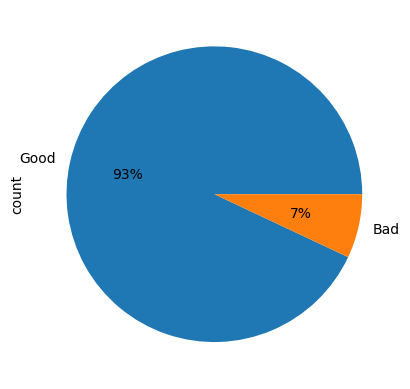

In [18]:
y.value_counts().plot(kind='pie', autopct='%1.0f%%')

## 2. Train/Test selection

Vì sao lại có train và test dataset, vì chúng ta muốn model học hơn là "ghi nhớ". 

Train dataset để model sẽ học được tính chất của phân bố trong data. Test dataset là để chúng ta kiểm thử lại độ hiệu quả của model bao gồm có "học quá sâu không? hay là học có đủ tốt chưa?"

Cách làm rất đơn giản, train và test sẽ được sample ngẫu nhiên trong feature data. Test size nên chọn khoảng 20% - 30%

In [19]:
# Chúng ta sẽ dùng thư viện sklearn, 1 thư viện chuyên giải quyết các bài toán Machine Learning
# nếu bạn chưa có,
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

Theo lý thuyết thống kê, nếu quá trình sample đủ tốt thì cả 2 dataset (X_train và X_test) đều mô phỏng giống "tính chất" của nhau.

Model sẽ có thể suy đoán tốt các tính chất của X_test kể cả model không được biết trước nó như thế nào. 

Data Scientist gọi nó là predictive model (mô hình dự đoán)

Kiểm tra lại label-ratio ở mỗi tập dataset

<Axes: ylabel='count'>

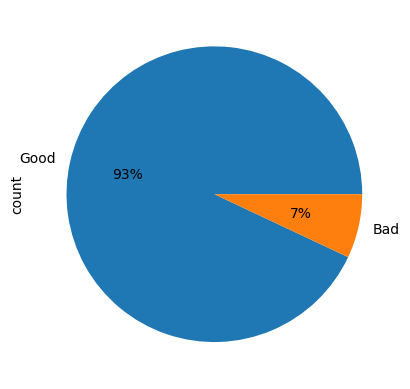

In [20]:
y_train.value_counts().plot(kind='pie', autopct='%1.0f%%')

<Axes: ylabel='count'>

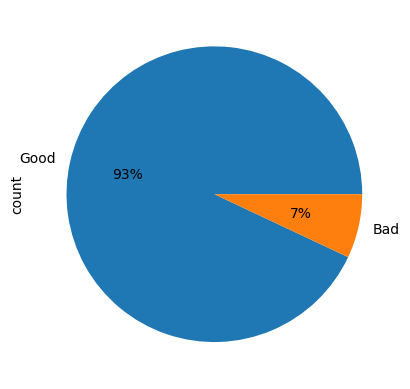

In [21]:
y_test.value_counts().plot(kind='pie', autopct='%1.0f%%')

## 3. Model Selection

Với output chỉ có 2 kết quả là "Good" & "Bad" thì đây người ta gọi là bài toán **binary-classification**

Bên cạnh bài toán **classification** thì còn có những bài toán **regression** (output là 1 khoảng điểm - continuous). 

Cách giải bài toán classification và regression sẽ khác nhau, đối với dữ liệu chúng ta có thể áp dụng cách giải regression cho cột *credit_score*. Nhưng giới hạn ở đây sẽ là binary-classification, phần đó để lớp nâng cao

Các bạn muốn tìm hiểu thêm, hãy liên hệ mình để tham khảo lớp ***Credit Scoring specialization course***

Có rất nhiều thuật toán Machine Learning sẵn có hiện nay ví dụ:

- **Classifier** (dành cho classification problem)
  - Nearest Neighbors
  - Linear SVM
  - RBF SVM
  - Gaussian Process
  - Decision Tree
  - Random Forest
  - Neural Net
  - AdaBoost
  - Naive Bayes
  - QDA
  - ...
- **Regressor** (dành cho regression problem)
  - Gradient Boosting Regression
  - Elastic Net Regression
  - Stochastic Gradient Descent Regression
  - Support Vector Machine
  - Bayesian Ridge Regression
  - CatBoost Regressor
  - Kernel Ridge Regression
  - Linear Regression
  - XGBoost Regressor
  - LGBM Regressor
  - ...
  
Mỗi mô hình có nhược và ưu riêng, bao gồm cả bộ tham số riêng. Việc hiểu và chọn model nào tốt cũng là 1 quá trình học hỏi lâu dài. 

Mình sẽ làm ví dụ 3 mô hình phổ biến hiện nay là **Logistic Regression**, **Decision Tree** và **Random Forest** (là 1 cải tiến của Decision Tree)

- Logistic Regression là 1 mô hình hồi quy, mô hình hóa xác suất vào sự quyết định lựa chọn của model (logit model)

<img src="./static/logit.jpeg" style="width: 800px;"/>

- Decision Tree là 1 mô hình phân nhánh (giống if-else condition)

<img src="./static/hw3_plot_tree.png" style="width: 800px;"/>

- Random Forest lại là 1 "rừng cây" hay là 1 tổ hợp của nhiều Decision Tree, mà mỗi Decision Tree sẽ đưa 1 kết quả. Kết quả của Random Forest sẽ là kết quả mà có số lượng "vote" nhiều nhất (major voting)

<img src="./static/hw3_random_forest.jpeg" style="width: 500px;"/>

## 4. Training Model

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()

In [23]:
log_reg_model.fit(X_train, y_train)

/Users/quan/opt/miniconda3/envs/aicv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()

In [25]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()

In [27]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

Xong rồi đó, quá trình train khá đơn giản phải ko nào? Bạn vừa mới tạo và train 2 Machine Learning

Chúc mừng bạn đã trở thành Data Scientist, giờ chỉ còn là vài bước đánh giá model performance thôi

## 5. Evaluate Model

Sau khi train xong, chúng ta cần kiểm tra model performance trên tập test_set để đảm bảo rằng model có khả năng generalize với unseen data

Thông thường chúng ta sẽ hay nghe nhiều đến **accuracy** thể hiện sự dự đoán chính xác nhưng nó chỉ đúng với có nghĩa với balance dataset. 

Đối với unbalanced dataset sẽ không có nhiều ý nghĩa. 

Khi nói đến dự đoán so với thực tế, sẽ có 4 trường hợp xảy ra trong bài toán này 

- Dự đoán Good và thực tế Good (True Positive  = TP)
- Dự đoán Bad và thực tế Good  (False Negative = FN)
- Dự đoán Good và thực tế Bad  (False Positive = FP)
- Dự đoán Bad và thực tế Bad   (True Negative  = TN)

Biểu đồ bên trái là confusion-matrix, bên phải là đã được translate sang bài toán của chúng ta.

An tâm rằng bạn sẽ gặp nó nhiều lần sau nữa, nên cứ take-time làm quen nó từ từ

<img src="./static/hw3_cm.png" style="width: 1000px;"/>

Trong đó accuracy được hiểu là 2 trường hợp **Dự đoán Good và thực tế Good** và **Dự đoán Bad và thực tế Bad** (TP + TN)

Nếu số lượng **Good** chiếm nhiều hơn **Bad** thì accuracy sẽ *chỉ miêu tả* phần **Good** còn phần **Bad** sẽ bị giảm nhẹ. Khiến độ đo accuracy không còn hữu dụng trong unbalanced dataset

> Ví dụ: Số lượng thực tế Good & Bad là 90:10. Nếu mô hình đơn giản chỉ cần dự đoán 100KH này là Good thì accuracy là 90/100 = 90%. 90% accuracy là 1 số ấn tượng nhưng model không dự đoán được Bad là ko hợp lý

Để đối phó với vấn đề unbalanced dataset, người ta thường sử dụng các độ đo đánh giá khác nhau như 
- Precision
- Recall
- F1-score
- Area Under the ROC Curve (AUC-ROC)
- Area Under the Precision-Recall Curve (AUC-PR). 

Các độ đo này tập trung vào việc đánh giá hiệu suất của mô hình một cách chi tiết hơn, bằng cách tính toán các giá trị dựa trên số lượng dự đoán đúng và sai của từng lớp

### Precision và Recall 

Là 2 độ đo phổ biến trong unbalanced dataset. Thường các bài toán sẽ cân nhắc chọn tối ưu 1 trong 2 (ít trường hợp đạt được tối ưu cả 2 trong thực tế). Và lựa chọn ưu tiên giữa Precision hay Recall là phù thuộc vào bài toán doanh nghiệp

Đối với các bạn mới sẽ hơi khó khăn cho các bạn phân biệt giữa Precision và Recall và khi nào nên dùng độ đo nào (kể cả mình cũng confuse nó rất nhiều lần, nên cứ cố gắng chấp nhận sai thì sửa thôi, ko hiểu thì từ từ bạn sẽ hiểu)

Trong binary labeling, chúng ta thường hay đặt giá trị label là 0 và 1, trong đó 1 còn được gọi là positive label. 

Bài toán Credit Scoring, thông thường chúng ta kiếm khách hàng tốt nên ưu tiên chọn 1 là Good và 0 là Bad

Giải thích sự ưu tiên ở 2 độ đo trong bài toán này:

- Nếu bạn chọn ưu tiên Precision cao hơn và chấp nhận Recall thấp xuống: đồng nghĩa với việc doanh nghiệp muốn đảm bảo rằng những khách hàng được dự đoán là "good" thực sự có khả năng là "good" cao. Điều này giúp doanh nghiệp đảm bảo rằng những khách hàng có khả năng trả nợ đúng hạn và đáng tin cậy được chấp nhận cho vay, giảm thiểu rủi ro tín dụng và tăng tính ổn định cho công ty. (hay nói tắt là **an toàn là trên hết**)

- Nếu bạn chọn ưu tiên Recall cao hơn và chấp nhận Precision thấp xuống: điều này đồng nghĩa với việc họ muốn đảm bảo rằng doanh nghiệp có thể phát hiện được càng nhiều khách hàng "good" càng tốt. Điều này có thể giúp đánh giá cao cơ hội kinh doanh với khách hàng tiềm năng và tăng tổng số lượng khách hàng chấp nhận cho vay. Tuy nhiên, việc chấp nhận nhiều khách hàng có thể tăng nguy cơ cho vấn đề nợ xấu (khách hàng thực tế không trả nợ đúng hạn). (hay nói tắt là **càng quét càng nhiều càng tốt**)

Đọc thêm: [Precision&Recall](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)

Giờ chúng ta cũng đã hiểu trực giác 2 độ đo Precision và Recall. Bắt đầu tính thử với bài toán này

In [28]:
# Trước hết chúng ta lấy kết quả của 2 model đã train ở phần trên
y_predict_logreg_model = log_reg_model.predict(X_test)
y_predict_decision_tree = decision_tree_model.predict(X_test)
y_predict_random_forest = random_forest_model.predict(X_test)

In [29]:
# Sử dụng sklearn để tính toán dùm precision and recall
from sklearn.metrics import precision_recall_fscore_support
p,r,f, _ = precision_recall_fscore_support(y_test, y_predict_logreg_model, average='binary', pos_label='Good')
print('Với positive label là Good, Logistic Regression model đạt được')
print(f'\tPrecision is {p:.2f}\n\tRecall is {r:.2f}\n\tF1 score is {f:.2f}')

Với positive label là Good, Logistic Regression model đạt được
	Precision is 0.93
	Recall is 1.00
	F1 score is 0.96


In [30]:
p,r,f, _ = precision_recall_fscore_support(y_test, y_predict_decision_tree, average='binary', pos_label='Good')
print('Với positive label là Good, Decision Tree model đạt được')
print(f'\tPrecision is {p:.2f}\n\tRecall is {r:.2f}\n\tF1 score is {f:.2f}')

Với positive label là Good, Decision Tree model đạt được
	Precision is 0.93
	Recall is 0.91
	F1 score is 0.92


In [31]:
p,r,f, _ = precision_recall_fscore_support(y_test, y_predict_random_forest, average='binary', pos_label='Good')
print('Với positive label là Good, Random Forest model đạt được')
print(f'\tPrecision is {p:.2f}\n\tRecall is {r:.2f}\n\tF1 score is {f:.2f}')

Với positive label là Good, Random Forest model đạt được
	Precision is 0.93
	Recall is 1.00
	F1 score is 0.96


Đây cũng là 1 kết quả rất tốt cho trên tập testset. Chúng ta có thể chấp nhận kết quả đây

> **Tạm thời chúng ta sẽ dừng evaluation ở đây, ở bài tập 5, bạn sẽ được đi sâu hơn vào evaluation hơn.**

> Trọng tâm của bài tập này là giải thích rõ ý nghĩa Precision/Recall với busines impact như thế nào

> **Lưu ý**: các bạn có thể tìm thấy kết quả rất bad ở độ đo AUCROC hoặc confusion-matrix. Nhưng mục tiêu ở bài làm ở đây ko phải là điều đó.

Bạn quyết định đóng máy và không tiếp tục dò tìm mô hình khác nữa hay đào sâu hơn nữa mà sẽ finalize model tại đây (dù bạn có thể kiếm 1 mô hình khác tốt hơn)

# B. Scoring

Sau khi đánh giá model performance trên test set (nội bộ trong team Data)

Kết quả rất khả quan và bạn rất phấn khích và muốn triển khai mô hình càng nhanh càng tốt. 

Tuy nhiên chúng ta đang quên đi bức tranh tổng quát, hãy tự hỏi câu hỏi sau đây:

1. Dữ liệu mà bạn train và test liệu đã được sample 1 cách ngẫu nhiên?
2. Liệu model của bạn có overfit trên train data không?
3. Dữ liệu mà ban đầu bạn nhận được đã mô phỏng đủ tốt cho toàn bộ population chưa?

- Đối với câu 1, bạn có thể check lại kiến thức về sampling và random uniform
- Câu 2 sẽ cần nhiều kiến thức nâng cao về kỹ năng mô hình (mình sẽ ko cover phần này và giả sử model của bạn ko bị overfit)
- Câu 3 sẽ là tình huống bạn gặp rất nhiều ở thực tế, khi mà data label bạn nhận được lại là 1 nhóm sample đặc thù và riêng biệt nào đó. Thực tế thì chúng ta không bao giờ xác định được đâu là sample chuẩn đại diện cho toàn population or (market outside)

Nhắc lại 1 chút về kiến thức sampling, chỉ khi bạn sampling số lượng đủ lớn và nhiều lần sampling khác nhau. Thì giá trị trung bình của tổng sample mean mới gần con số population mean và sai số suy diễn càng thấp (Central Limit Theorem)

Tham khảo thêm: [Phân phối xác suất của giá trị trung bình của mẫu](https://vandekinhte.wordpress.com/2018/10/16/chuong-7-phan-phoi-xac-suat-cua-gia-tri-trung-binh-cua-mau-the-sampling-distribution-of-the-sample-mean/comment-page-1/)

> Nói dễ hiểu hơn: kể cả khi model của bạn có performance rất tốt nhưng ra thực tế thì có khi kết quả rất tệ vì data bạn sử dụng không "đại diện" cho unseen data (bạn ko bao giờ biết được population distribution). Bởi vậy chúng ta mới có những hypothesis testing, t-testing và A/B Testing

Bây giờ chúng ta sẽ thử nghiệm scoring với unseen data (giả sử là sample của Marketing)

In [32]:
unseen_metadata = pd.read_csv('./data/hw3_marketing_testset.csv', index_col=0)
unseen_label = unseen_metadata.pop('credit_label')
unseen_feat = unseen_metadata[X_train.columns]

Lúc này unseen-feat giống như X-test và unseen-label giống y-test ở trên của bạn 

In [33]:
# Trước hết chúng ta lấy kết quả của 2 model đã train ở phần trên
pred_unseen_log_reg = log_reg_model.predict(unseen_feat)
pred_unseen_decision_tree = decision_tree_model.predict(unseen_feat)
pred_unseen_random_forest = random_forest_model.predict(unseen_feat)

In [34]:
p,r,f, _ = precision_recall_fscore_support(unseen_label, pred_unseen_log_reg, average='binary', pos_label='Good')
print('Với positive label là Good, Decision Tree model đạt được')
print(f'\tPrecision is {p:.2f}\n\tRecall is {r:.2f}\n\tF1 score is {f:.2f}')

Với positive label là Good, Decision Tree model đạt được
	Precision is 0.73
	Recall is 1.00
	F1 score is 0.85


In [35]:
p,r,f, _ = precision_recall_fscore_support(unseen_label, pred_unseen_decision_tree, average='binary', pos_label='Good')
print('Với positive label là Good, Decision Tree model đạt được')
print(f'\tPrecision is {p:.2f}\n\tRecall is {r:.2f}\n\tF1 score is {f:.2f}')

Với positive label là Good, Decision Tree model đạt được
	Precision is 0.73
	Recall is 0.91
	F1 score is 0.81


In [36]:
p,r,f, _ = precision_recall_fscore_support(unseen_label, pred_unseen_random_forest, average='binary', pos_label='Good')
print('Với positive label là Good, Random Forest model đạt được')
print(f'\tPrecision is {p:.2f}\n\tRecall is {r:.2f}\n\tF1 score is {f:.2f}')

Với positive label là Good, Random Forest model đạt được
	Precision is 0.73
	Recall is 1.00
	F1 score is 0.85


Rõ ràng kết quả cả 2 model đã khác so với testset ban đầu rất nhiều

Model bây giờ không còn giữ precision cao như ban đầu nữa (tức KH good thực sự là good **an toàn là trên hết**), mà nó lại trade-off với Recall (tức là **gom càng nhiều càng tốt**)

Lý do cũng là data ban đầu bạn nhận được để train model không đại diện cho data unseen này.

Bạn có thể test với data của risk (file hw3_risk_testset.csv)

Để giải quyết tình trạng ưu tiên Precision hay Recall hơn trong doanh nghiệp là 1 bài toán Thresholding ở phần sau

# C. Conclusion

Tổng kết lại bài tập này, qua bài tập này bạn đã biết 

- Cách 1 quy trình chuẩn làm Modeling
- Được giới thiệu Machine Learning model: Decision Tree và Random Forest
- Hiểu được metric Precison/Recall trong unbalanced dataset
- Hiểu được tầm quan trọng của Sampling

Đây cũng là bài tập cuối cùng của Credit Scoring

Nếu bạn thấy hứng thú những vấn đề chuyên sâu hơn (như Hypothesis Testing, AB Testing, mixing classification & regression problem, Probability Calibration...etc trong Data Science) thì hãy liên hệ mình để được học lớp nâng cao và chuyên sâu.